###1. Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [1]:
def reverse_string(word):
  word_lst = [char for char in word]
  
  max_ind = len(word_lst) - 1
  new_word_lst = [word_lst[max_ind - i] for i in range(len(word_lst))]

  new_word = ''.join(new_word_lst)
  
  return new_word

word = 'flower'

reverse_string(word)



'rewolf'

###2. Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

In [2]:
def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)"""
    not_a = 1 - a
    a_given_b = (b_given_a * a)/((a*b_given_a) + (not_a*b_given_not_a))
    return a_given_b

bayes(.005, .99, .01)
  

0.33221476510067116

###3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

###a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow, given their meaning? {Gaussian}
 - Stolen bases per game
 - Wins
 - Earned run average

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

lahman = drive.CreateFile({'id':'1Bla3VvH3n3NG5aDyfOnMllcxJuHYGvDv'}) 
lahman.GetContentFile('lahman-teams.csv')  
df = pd.read_csv('lahman-teams.csv')


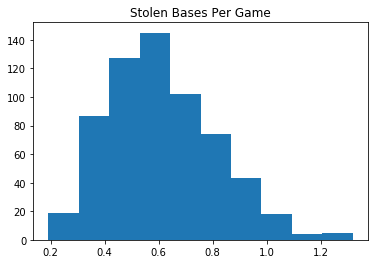

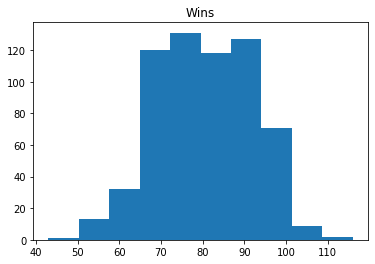

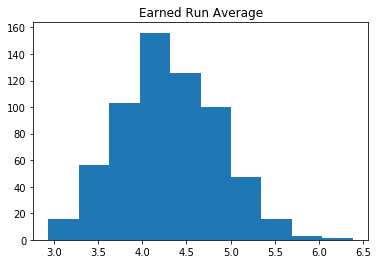

In [4]:
new = (df.yearID >= 1995)
new_df = df.iloc[new.values]
new_df = new_df.assign(SB_per_game = new_df.SB/new_df.G)
plt.hist(new_df.SB_per_game)
plt.title('Stolen Bases Per Game')
plt.show()

plt.hist(new_df.W)
plt.title('Wins')
plt.show()

plt.hist(new_df.ERA)
plt.title('Earned Run Average')
plt.show()

###b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

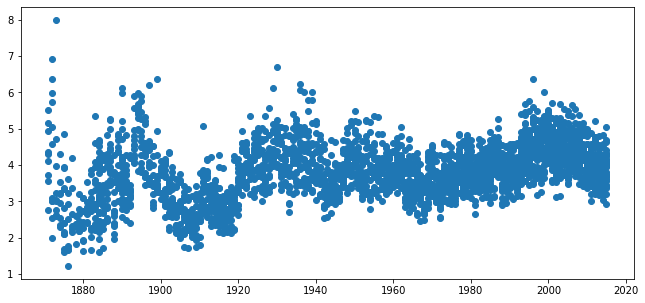

In [5]:
plt.figure(figsize = (11,5))
plt.scatter(x=df.yearID, y=df.ERA)
plt.show()

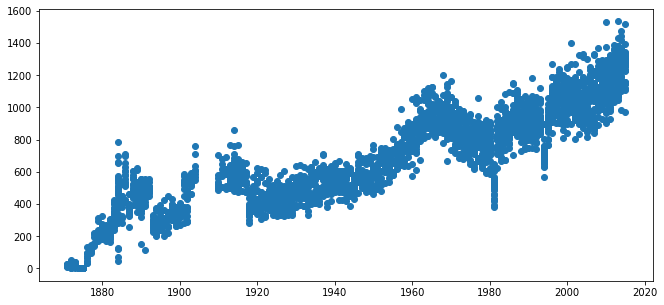

In [6]:
plt.figure(figsize = (11,5))
plt.scatter(x=df.yearID, y=df.SO)
plt.show()

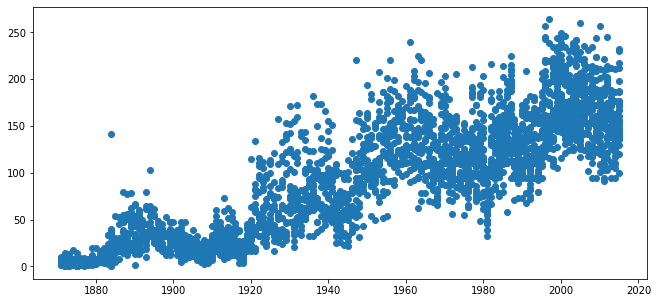

In [7]:
plt.figure(figsize = (11,5))
plt.scatter(x=df.yearID, y=df.HR)
plt.show()

In [8]:
values = {'SO':0}
filled_df = df.fillna(value=values)
values = {'SO':0}
filled_df = df.fillna(value=values)

year_hr_so = filled_df[['yearID', 'HR', 'SO']]
stats.pearsonr(year_hr_so['HR'], year_hr_so['SO'])

(0.8048311159766921, 0.0)

My finding: Although ERA has stayed fairly stable through the years, strikeouts have gone up tremendously. How can that be? Well, it turns out that even though pitchers are striking out more batters, applying downward pressure on their ERA, hitters are hitting more home runs. I found that there is a strong correlation between strikeouts and home runs, implying that pitchers aren't actually getting better (more strikeouts) but rather batters are swinging for the fences more often, both for good (hitting more home runs) and bad (striking out more). 

###4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow? {Normal}

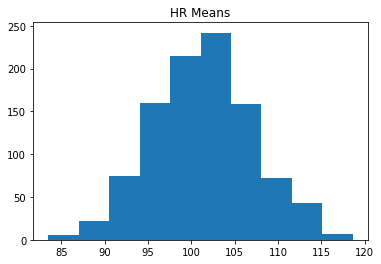

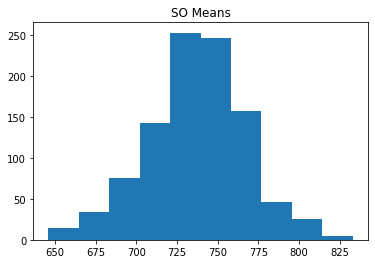

In [9]:


hr_means = [np.mean(df['HR'].sample(n=100)) for i in range(1000)]
plt.hist(hr_means)
plt.title('HR Means')
plt.show()

so_means = [np.mean(df['SO'].sample(n=100)) for i in range(1000)]
plt.hist(so_means)
plt.title('SO Means')
plt.show()